In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install openpyxl

# Question2

In [3]:
df = pd.read_csv('calibrationcurve.csv',skiprows=19)

In [4]:
df

,Pitot/static Probe Velocity [m/s],Hotwire Ev [Volts]
0,0.362,1.262
1,0.363,1.266
2,0.428,1.261
3,0.442,1.288
4,0.510,1.334
...,...,...
110,21.071,2.072
111,21.103,2.071
112,21.137,2.074
113,21.214,2.075


In [5]:
df['a_0']=131.955;
df['a_1']=-326.703
df['a_2']=309.377;
df['a_3']=-136.269;
df['a_4']=24.409

In [6]:
df

,Pitot/static Probe Velocity [m/s],Hotwire Ev [Volts],a_0,a_1,a_2,a_3,a_4
0,0.362,1.262,131.955,-326.703,309.377,-136.269,24.409
1,0.363,1.266,131.955,-326.703,309.377,-136.269,24.409
2,0.428,1.261,131.955,-326.703,309.377,-136.269,24.409
3,0.442,1.288,131.955,-326.703,309.377,-136.269,24.409
4,0.510,1.334,131.955,-326.703,309.377,-136.269,24.409
...,...,...,...,...,...,...,...
110,21.071,2.072,131.955,-326.703,309.377,-136.269,24.409
111,21.103,2.071,131.955,-326.703,309.377,-136.269,24.409
112,21.137,2.074,131.955,-326.703,309.377,-136.269,24.409
113,21.214,2.075,131.955,-326.703,309.377,-136.269,24.409


In [7]:
df.columns

Index(['Pitot/static Probe Velocity [m/s]', ' Hotwire Ev [Volts]', 'a_0',
       'a_1', 'a_2', 'a_3', 'a_4'],
      dtype='object')

In [8]:
df.to_csv('table1.csv')

In [12]:
calibration_coef = np.poly1d([24.409,-136.269,309.377,-326.703,131.955])
print(calibration_coef)                     

       4         3         2
24.41 x - 136.3 x + 309.4 x - 326.7 x + 132


In [15]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

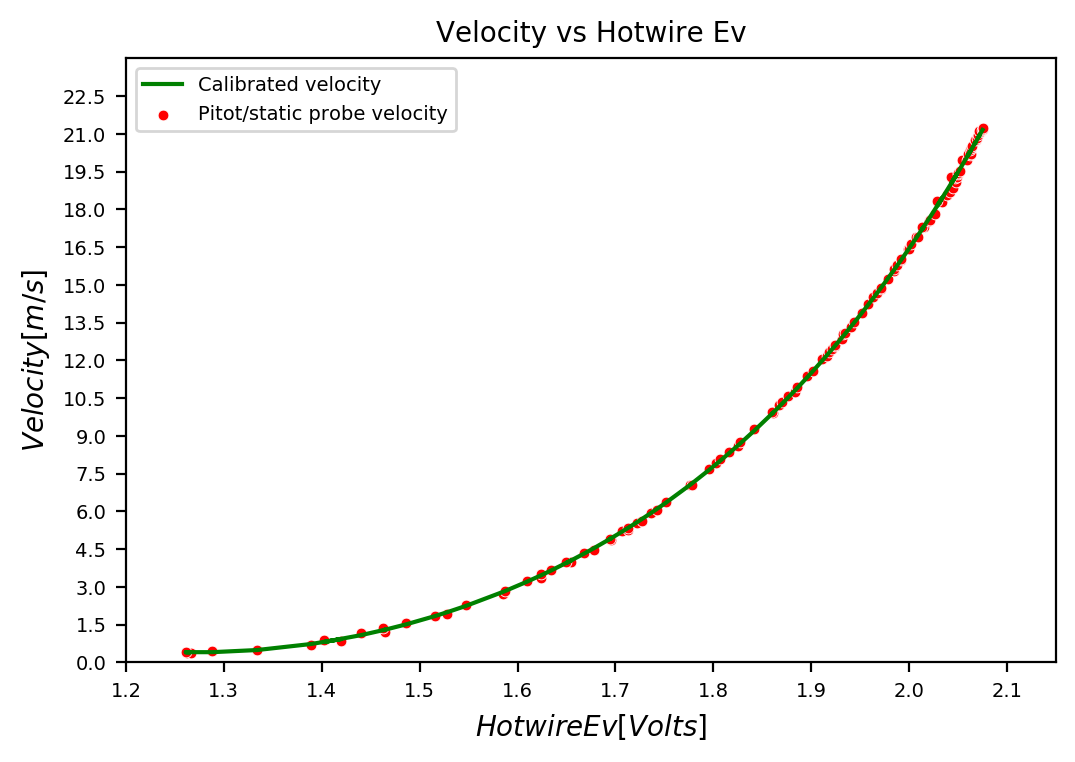

In [35]:
plt.figure(dpi=200);
sns.scatterplot(x=' Hotwire Ev [Volts]',y='Pitot/static Probe Velocity [m/s]',data=df,label='Pitot/static probe velocity',color='r',s=15);
plt.plot(df[' Hotwire Ev [Volts]'].values,np.polyval(calibration_coef,df[' Hotwire Ev [Volts]'].values),'-g',label='Calibrated velocity');
plt.legend(fontsize=7);
plt.ylabel('$Velocity[m/s]$');
plt.ylim(0,24);
plt.yticks(np.arange(0,24,step=1.5),fontsize=7);

plt.xlim(1.2,2.15)
plt.xticks(np.arange(1.2,2.15,step=0.1),fontsize=7);
plt.xlabel('$Hotwire Ev[Volts]$');
plt.title('Velocity vs Hotwire Ev',fontsize=10);
plt.savefig('question1.png',dpi=200)

# Question3

In [11]:
file_name = 'velocity{}.csv'
df_list = []
for i in range(1, 5):
    df_list.append(pd.read_csv(file_name.format(i),skiprows=15))


In [12]:
velocity1=df_list[0];
velocity2=df_list[1];
velocity3=df_list[2];
velocity4=df_list[3];

In [13]:
velocity1.columns

Index(['Lateral Position [mm]', ' Pitot/Static Vel [m/s]',
       ' Pitot/Static Vel Stdev [m/s]', ' Hot Wire Vel [m/s]',
       ' Hot Wire Vel Stdev [m/s]'],
      dtype='object')

In [14]:
v1_infinity=20.244
v2_infinity=20.295
v3_infinity=20.317
v4_infinity=20.143
#will be used to normalize velocity

In [15]:
y0_1 =velocity1['Lateral Position [mm]'][np.argmin(velocity1['Lateral Position [mm]'])]
y0_2 =velocity1['Lateral Position [mm]'][np.argmin(velocity2['Lateral Position [mm]'])]
y0_3 =velocity1['Lateral Position [mm]'][np.argmin(velocity3['Lateral Position [mm]'])]
y0_4 =velocity1['Lateral Position [mm]'][np.argmin(velocity4['Lateral Position [mm]'])]
D = 120 #mm
#will be used to normalzie lateral location

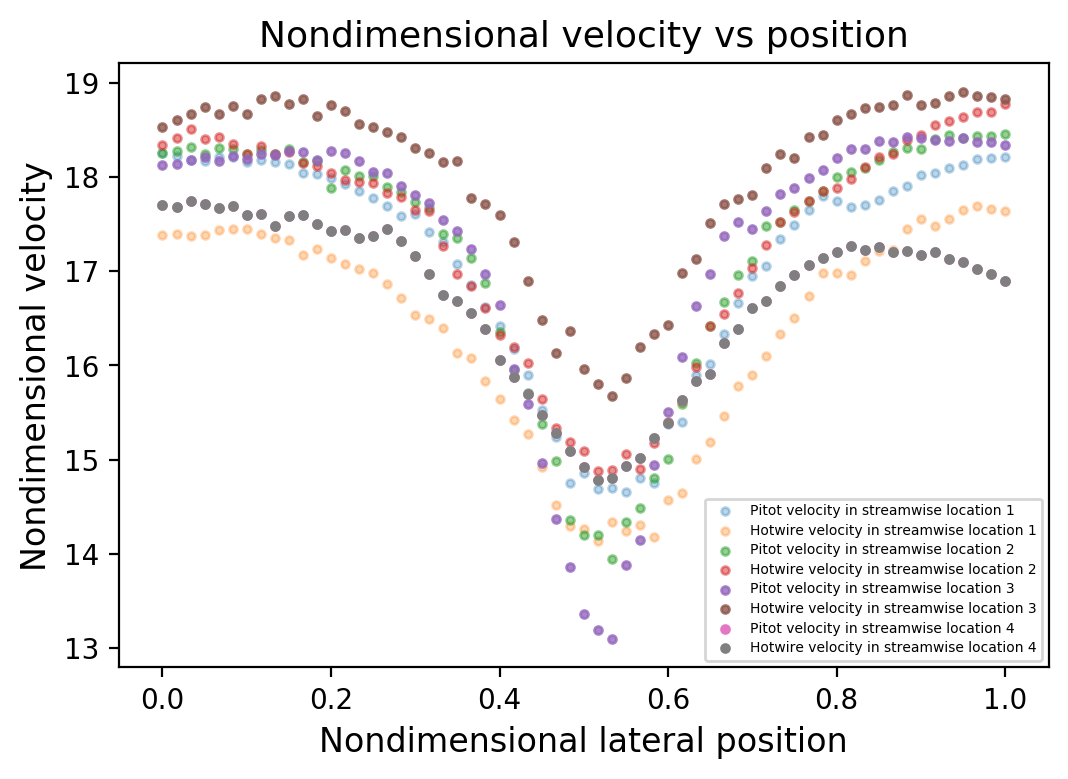

In [16]:
#comment: should I use scatter plot or line plot??? 
plt.figure(dpi=200)
plt.scatter((velocity1['Lateral Position [mm]']-y0_1)/D,velocity1[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 1',s=8,alpha=0.3);

plt.scatter((velocity1['Lateral Position [mm]']-y0_1)/D,velocity1[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 1',s=8,alpha=0.3);

plt.scatter((velocity2['Lateral Position [mm]']-y0_2)/D,velocity2[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 2',s=8,alpha=0.5);

plt.scatter((velocity2['Lateral Position [mm]']-y0_2)/D,velocity2[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 2',s=8,alpha=0.5);

plt.scatter((velocity3['Lateral Position [mm]']-y0_3)/D,velocity3[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 3',s=8,alpha=0.8);

plt.scatter((velocity3['Lateral Position [mm]']-y0_3)/D,velocity3[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 3',s=8,alpha=0.8);

plt.scatter((velocity4['Lateral Position [mm]']-y0_4)/D,velocity4[' Hot Wire Vel [m/s]'],\
            label='Pitot velocity in streamwise location 4',s=8);

plt.scatter((velocity4['Lateral Position [mm]']-y0_4)/D,velocity4[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 4',s=8);

plt.legend(loc='lower right',prop={'size': 5},labelspacing=0.4);
plt.xlabel('Nondimensional lateral position',fontsize=12);
plt.ylabel('Nondimensional velocity',fontsize=12);
plt.title('Nondimensional velocity vs position',fontsize=13);

# Question 4

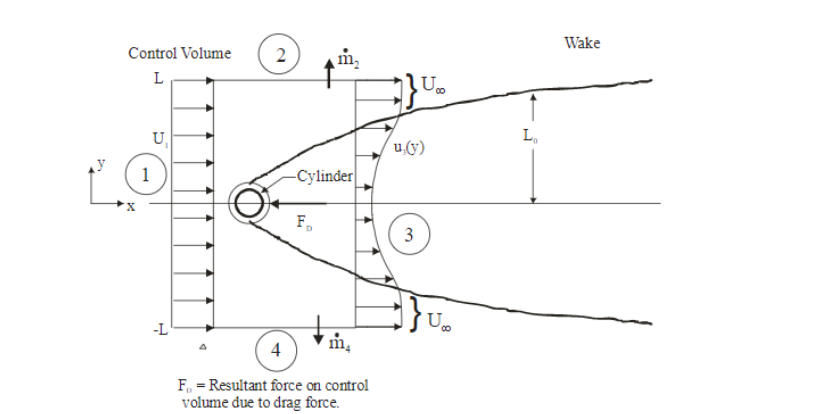

We start with 4 surfaces within the control volume, labeld 1,2,3,4, as shown above.
Force balance: 

-F_D = $-\mathrm{w} \rho \int_{-L}^{L} \mathrm{U}_{1} \mathrm{U}_{1} \mathrm{~d} \mathrm{y}+\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{u}_{3}(\mathrm{y}) \mathrm{u}_{3}(\mathrm{y}) \mathrm{dy}+\left(\dot{\mathrm{m}}_{2}+\dot{\mathrm{m}}_{4}\right) \mathrm{U}_{1}$

Mass balance:

0 = $-\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{U}_{1} \mathrm{dy}+\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{u}_{3}(\mathrm{y}) \mathrm{d} \mathrm{y}+\left(\dot{\mathrm{m}}_{2}+\dot{\mathrm{m}}_{4}\right)$


Therefore, multiply the mass balance quation by $\mathrm{U}_{1}$ and combine with force balance:
$F_{D}=\rho_{\infty} w \int_{-L}^{L} u_{3}(y)\left[U_{1}-u_{3}(y)\right] d y$

# Question 7

In [31]:
#read in files with a for loop
file_name = 'FFT{}.xlsx'
sheet_name = 'sheet{}'
df_list_FFT = []
for i in range(1, 6):
    df_list_FFT.append(pd.read_excel(file_name.format(i)))

In [32]:
#FFT1=pd.read_excel('FFT1.xlsx', sheet_name='sheet1')

In [33]:
FFT1=df_list_FFT[0]
FFT2=df_list_FFT[1]
FFT3=df_list_FFT[2]
FFT4=df_list_FFT[3]

In [34]:
FFT1.shape

(1024, 50)

In [35]:
headers=FFT1.columns

In [36]:
headers

Index(['Untitled', 'Untitled 1', 'Untitled 2', 'Untitled 3', 'Untitled 4',
       'Untitled 5', 'Untitled 6', 'Untitled 7', 'Untitled 8', 'Untitled 9',
       'Untitled 10', 'Untitled 11', 'Untitled 12', 'Untitled 13',
       'Untitled 14', 'Untitled 15', 'Untitled 16', 'Untitled 17',
       'Untitled 18', 'Untitled 19', 'Untitled 20', 'Untitled 21',
       'Untitled 22', 'Untitled 23', 'Untitled 24', 'Untitled 25',
       'Untitled 26', 'Untitled 27', 'Untitled 28', 'Untitled 29',
       'Untitled 30', 'Untitled 31', 'Untitled 32', 'Untitled 33',
       'Untitled 34', 'Untitled 35', 'Untitled 36', 'Untitled 37',
       'Untitled 38', 'Untitled 39', 'Untitled 40', 'Untitled 41',
       'Untitled 42', 'Untitled 43', 'Untitled 44', 'Untitled 45',
       'Untitled 46', 'Untitled 47', 'Untitled 48', 'Untitled 49'],
      dtype='object')

In [23]:
n=1024

In [37]:
Freestream10=np.fft.fft(np.mean(FFT1,axis=1))
freq10=np.fft.fftfreq(n)

In [38]:
print(Freestream10.shape)
print(y.shape)

(1024,)
(1024,)


In [39]:
freq10.shape

(1024,)

D:\Softwares\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


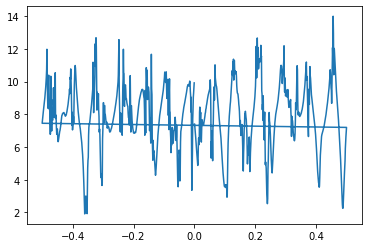

In [40]:
plt.plot(freq10, y);